In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

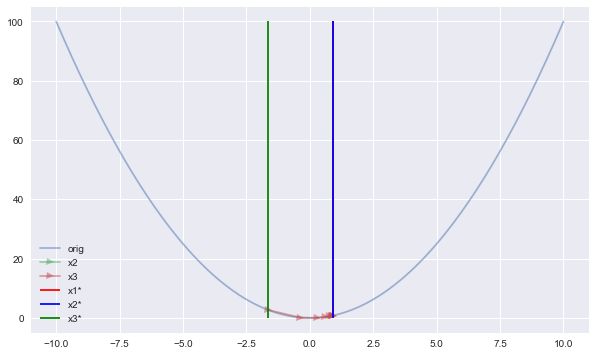

In [146]:
# 初始选择三个点
x=np.linspace(-10,10,num=int(20/0.1)+1)

def fx(x):
    return x**2
y=fx(x)
x1=0.9
h=0.01
h_l=[]
x2_l=[]
fx2_l=[]
x3_l=[]
fx3_l=[]
tui=False
x2=x1+h
fx2=fx(x2)

# print(x2,fx2,h,2)
if fx2<fx(x1):
    pass
else:
    h=-h
x2_l.append(x2)
fx2_l.append(fx2)
h_l.append(h)

tui=False
while 1:
    x3=x2+h
    fx3=fx(x3 )
    # print(x3,fx(x3),h,3)
    if fx(x3)<fx(x2):
        h=2*h
    else:
        tui=True
    x3_l.append(x3)
    fx3_l.append(fx3)
    h_l.append(h)
    if tui:
        break
plt.figure(figsize=(10,6))
plt.plot(x,y,alpha=0.5)
plt.plot(x2_l,np.array(fx2_l)+0,alpha=0.5,marker='>')
plt.plot(x3_l,np.array(fx3_l)+0,alpha=0.5,marker='>')
plt.vlines(x1,ymin=min(y),ymax=max(y),label='x1*',colors='r')
plt.vlines(x2,ymin=min(y),ymax=max(y),label='x2*',colors='b')
plt.vlines(x3,ymin=min(y),ymax=max(y),label='x3*',colors='g')
plt.legend(['orig','x2','x3','x1*','x2*','x3*'])
plt.show()

0.9786888622052689 1.0181361846920185
         x1        x2        xa        xb       fxa        fxb
0  1.146000  1.854000  0.000000  3.000000  2.000000  20.000000
1  0.708228  1.145772  0.000000  1.854000  2.000000   2.810784
2  1.145913  1.416315  0.708228  1.854000  0.230554   2.810784
3  0.978717  1.145826  0.708228  1.416315  0.230554   0.592110
4  0.875390  0.978663  0.708228  1.145826  0.230554   0.066897
5  0.978697  1.042519  0.875390  1.145826  0.044648   0.066897
6  0.939234  0.978676  0.875390  1.042519  0.044648   0.005501
7  0.978689  1.003064  0.939234  1.042519  0.010853   0.005501
8  1.003072  1.018136  0.978689  1.042519  0.001353   0.005501


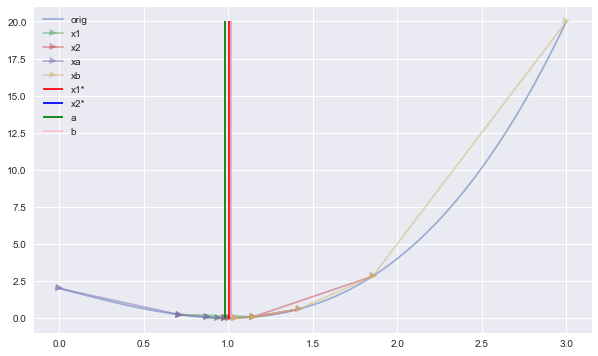

9


In [103]:
# 黄金分割法区间收缩法
def f1(x):
    return x**3-3*x+2

x=np.linspace(0,3,num=int(20/0.1)+1)
y=f1(x)
a=0
b=3
eps=0.05
ratio=0.618
fxa=f1(a)
fxb=f1(b)

x1_l=[]
fx1_l=[]
x2_l=[]
fx2_l=[]
xa_l=[]
fxa_l=[]
xb_l=[]
fxb_l=[]
cishu=0
while 1:
    x1=a+(b-a)*(1-ratio)
    x2=a+(b-a)*ratio
    fx1=f1(x1)
    fx2=f1(x2)
    x1_l.append(x1)
    fx1_l.append(fx1)
    x2_l.append(x2)
    fx2_l.append(fx2)
    xa_l.append(a)
    fxa_l.append(fxa)
    xb_l.append(b)
    fxb_l.append(fxb)
    if fx1<fx2:
        b=x2
        fxb=fx2
    else:
        a=x1
        fxa=fx1
    cishu+=1
    if b-a<eps:
        break
print(a,b)
table=pd.DataFrame(data={
    'x1':x1_l,
    'x2':x2_l,
    'xa':xa_l,
    'xb':xb_l,
    # 'fx1':fx1_l,
    # 'fx2':fx2_l,
    'fxa':fxa_l,
    'fxb':fxb_l,
})
print(table)
plt.figure(figsize=(10,6))
plt.plot(x,y,alpha=0.5)
plt.plot(x1_l,np.array(fx1_l)+0,alpha=0.5,marker='>')
plt.plot(x2_l,np.array(fx2_l)+0,alpha=0.5,marker='>')
plt.plot(xa_l,np.array(fxa_l)+0,alpha=0.5,marker='>')
plt.plot(xb_l,np.array(fxb_l)+0,alpha=0.5,marker='>')
plt.vlines(x1,ymin=min(y),ymax=max(y),colors='r')
plt.vlines(x2,ymin=min(y),ymax=max(y),colors='b')
plt.vlines(a,ymin=min(y),ymax=max(y),colors='g')
plt.vlines(b,ymin=min(y),ymax=max(y),colors='pink')
plt.legend(['orig','x1','x2','xa','xb','x1*','x2*','a','b'])
plt.show()
print(cishu)

In [5]:
def solve_erci_hanshu(x,fx):
    x=np.array(x)
    fx=np.array(fx)
    A=np.array([[1]*3,x,x**2]).T
    return np.linalg.solve(A,fx)

x=np.array([1,2,3])
fx_y=f1(x)
print(solve_erci_hanshu(x,fx_y))

[  8. -14.   6.]


31


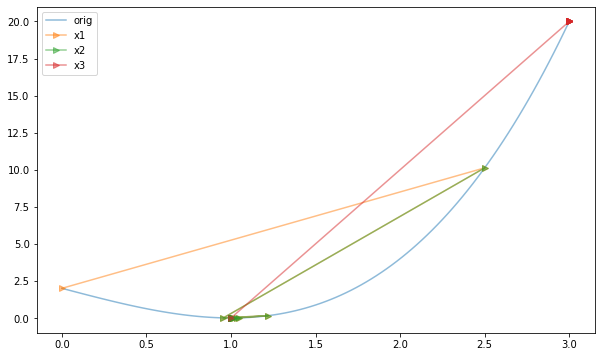

In [6]:
# 二次插值法区间收缩
x=np.linspace(0,3,100+1)
def f2(x):
    return x**3-3*x+2
y=f2(x)
x1=0
x2=2.5
x3=3
x1_l=[]
fx1_l=[]
x2_l=[]
fx2_l=[]
x3_l=[]
fx3_l=[]


eps=0.05
cishu=0
while 1:
    fx1=f2(x1)
    fx2=f2(x2)
    fx3=f2(x3)
    x1_l.append(x1)
    x2_l.append(x2)
    x3_l.append(x3)
    fx1_l.append(fx1)
    fx2_l.append(fx2)
    fx3_l.append(fx3)
    a0,a1,a2=solve_erci_hanshu([x1,x2,x3],[fx1,fx2,fx3])
    # print(a0,a1,a2)
    x_bar=-a1/2/a2
    fx_bar=a0+a1*x_bar+a2*x_bar**2
    if fx_bar<fx2:
        # x2成为左边的边界
        x1,x2,x3=x2,x_bar,x3
    else:
        # x2成为右边的边界
        x1,x2,x3=x1,x_bar,x2
    # print(x3-x1,x1,x2,x3,x_bar)
    cishu+=1
    if x3-x1<=eps:
        fx1=f2(x1)
        fx2=f2(x2)
        fx3=f2(x3)
        x1_l.append(x1)
        x2_l.append(x2)
        x3_l.append(x3)
        fx1_l.append(fx1)
        fx2_l.append(fx2)
        fx3_l.append(fx3)
        break
print(cishu)

plt.figure(figsize=(10,6))
plt.plot(x,y,alpha=0.5)
plt.plot(x1_l,np.array(fx1_l),alpha=0.5,marker='>')
plt.plot(x2_l,np.array(fx2_l),alpha=0.5,marker='>')
plt.plot(x3_l,np.array(fx3_l),alpha=0.5,marker='>')
# plt.vlines(x1,ymin=min(y),ymax=max(y),colors='r')
# plt.vlines(x2,ymin=min(y),ymax=max(y),colors='b')
# plt.vlines(x3,ymin=min(y),ymax=max(y),colors='g')
plt.legend([
    'orig',
            'x1','x2','x3','x1*','x2*','x3*'])
plt.show()

### 进入到线搜索的非精准搜索
### Armijo 准则
若
$$
f(x^k+\alpha d^k) \le f(x^k)+c_1 \alpha \nabla f(x^k)^T d^k
$$
则步长$\alpha$满足Armijo准则，其中常数$c_1\in(0,1)$
选择的点必在直线之下
满足准则使得函数值下降
常数$c_1$的大小和效率有关

In [7]:
# Armijo准则实现
class Armijo:
    def __init__(self,alpha,f,df,ratio):
        self.alpha=alpha
        self.f=f
        self.df=df
        self.ratio=ratio # 步长等比例减小

    def _panduan(self, x, alpha, d, c):
        # 查看是否符合条件
        return self.f(x+alpha*d)<=self.f(x)+c*alpha*self.df(x).T*d

    def go_down(self,x):
        # 这个没说d怎么来，那就搞个负梯度
        d=-self.df(x)
        alpha=self.alpha
        c=0.5 # 随便给
        m=0 # 迭代次数
        while not self._panduan(x, alpha, d, c):
            alpha=self.ratio**m
            m+=1
        return alpha,x+alpha*d

def f(x):
    return x**2-2*x+1

def df(x):
    return 2*x-2

armijo_stepper=Armijo(alpha=5,f=f,df=df,ratio=0.8)
x=np.array([0])
eps=0.001
for i in range(10):
    x_old=x
    alpha,x=armijo_stepper.go_down(x)
    print(armijo_stepper.alpha,x)
    if np.linalg.norm(x-x_old)<eps:
        break

5 [0.8192]
5 [0.96731136]
5 [0.99408989]
5 [0.99893145]
5 [0.99980681]


因为Armijo准则可能找到过小的步长，所以想到引入另一直线，让步长在直线上方
若
$$
f(x^k+\alpha d^k) \le f(x^k)+c \alpha \nabla f(x^k)^T d^k
f(x^k+\alpha d^k) \ge f(x^k)+(1-c) \alpha \nabla f(x^k)^T d^k
$$
则称步长$\alpha$满足Armijo-Goldstein准则，简称Goldstein准则，其中常数$c\in(0,1/2)$
Goldstein虽然能让函数值下降，但是有可能避开最优值

In [8]:
# Goldstein准则实现
class Goldstein:
    def __init__(self,alpha,f,df,ratio,c):
        self.alpha=alpha
        self.f=f
        self.df=df
        self.c=c
        self.ratio=ratio # 步长等比例减小

    def _panduan(self, x, alpha, d, c):
        # 查看是否符合条件
        if (self.f(x+alpha*d)<=self.f(x)+c*alpha*self.df(x).T*d) and \
               (self.f(x+alpha*d)>=self.f(x)+(1-c)*alpha*self.df(x).T*d):
            return True

    def go_down(self,x):
        # 这个没说d怎么来，那就搞个负梯度
        d=-self.df(x)
        alpha=self.alpha
        m=0 # 迭代次数
        while not self._panduan(x, alpha, d, self.c) :
            # print(alpha)
            alpha=self.ratio**m
            m+=1
        return alpha,x+alpha*d

def f(x):
    return x**2-2*x+1

def df(x):
    return 2*x-2

goldstein_stepper=Goldstein(alpha=5,f=f,df=df,ratio=0.8,c=0.1)
# c不能取0.5,否则判断条件只会在初始点成立
x=np.array([4])
eps=0.001
for i in range(100):
    x_old=x
    alpha,x=goldstein_stepper.go_down(x)
    print(x)
    if np.linalg.norm(x-x_old)<eps:
        print(f'迭代次数{i+1}')
        break
# 和Armijo相比，这种方法会在最优解附近一直徘徊，是因为他有可能是取不到最优值的吗？

[-0.8]
[2.08]
[0.352]
[1.3888]
[0.76672]
[1.139968]
[0.9160192]
[1.05038848]
[0.96976691]
[1.01813985]
[0.98911609]
[1.00653035]
[0.99608179]
[1.00235092]
[0.99858945]
[1.00084633]
[0.9994922]
[1.00030468]
迭代次数18


### Wolfe准则
设$d^k$是点$x^k$处的下降方向，若
$$
f(x^k+\alpha d^k)\le f(x^k)+c_1 \alpha \nabla f(x^k)^T d^k\\
\nabla f(x^k+\alpha d^k)^T d^k \ge \nabla f(x^k)^T d^k
$$
则步长$\alpha$满足Wolfe准则。其中$c_1,c_2\in(0,1)$，且$c_1<c_2$
几何意义：可接受点处的切线斜率$\nabla f(x^k+\alpha d^k)^T d^k$大于等于初始斜率$\nabla f(x^k)^T d^k$的$c_2$倍


In [9]:
# Wolfe 准则实现
class Wolfe:
    def __init__(self,alpha,f,df,ratio,c):
        self.alpha=alpha
        self.f=f
        self.df=df
        self.c1,self.c2=c
        self.ratio=ratio # 步长等比例减小

    def _panduan1(self, x, alpha, d, c1):
        # 查看是否符合Armijo条件
        if self.f(x+alpha*d)<=self.f(x)+c1*alpha*self.df(x).T*d:
            return True
    def _panduan2(self,x,alpha,d,c2):
        # 查看是否符合Wolfe条件
        if self.df(x+alpha*d).T*d>=c2*self.df(x).T*d :
            return True

    def go_down(self,x):
        # 这个没说d怎么来，那就搞个负梯度
        d=-self.df(x)
        alpha=self.alpha
        m=0 # 迭代次数
        while 1 :
            if self._panduan1(x,alpha,d,self.c1):
                break
            alpha=self.ratio**m
            m+=1
        if self._panduan2(x,alpha,d,self.c2):
            return alpha,x+alpha*d
        else:
            beta=self.ratio**(m-1)*alpha
            alpha=alpha+self.ratio*(beta-alpha)
            print('!!!')
            return alpha,x+alpha*d

def f(x):
    return x**2-2*x+1

def df(x):
    return 2*x-2

wolfe_stepper=Wolfe(alpha=5,f=f,df=df,ratio=0.8,c=(0.1,0.02))
x=np.array([4])
eps=0.001
for i in range(100):
    x_old=x
    alpha,x=wolfe_stepper.go_down(x)
    print(x)
    if np.linalg.norm(x-x_old)<eps:
        print(f'迭代次数{i+1}')
        break
# 很神奇的现象，就是在c1和goldstein的c相等时，这个搜索路径和goldstein的一模一样的。
# 疑问

[-0.8]
[2.08]
[0.352]
[1.3888]
[0.76672]
[1.139968]
[0.9160192]
[1.05038848]
[0.96976691]
[1.01813985]
[0.98911609]
[1.00653035]
[0.99608179]
[1.00235092]
[0.99858945]
[1.00084633]
[0.9994922]
[1.00030468]
迭代次数18


### 证明算法收敛
#### 定理：设假设条件和夹角条件成立，下降算法步长由精确线搜索确定，则算法收敛
假设条件是 $\begin{Vmatrix}\nabla{f(x)}-\nabla{f(y)}\end{Vmatrix}\le L \begin{Vmatrix}x-y\end{Vmatrix},\forall x,y \in R^n$
夹角条件 $ cos\theta_k \ge \sigma >0 $ $cos\theta_k=\frac{-\nabla f(x^k)^T d^k}{\begin{Vmatrix}\nabla{f(x^k)}\end{Vmatrix} \begin{Vmatrix}\nabla{d^k}\end{Vmatrix}}$

Zoutendijk 条件
$\sum_{k=0}^{\infty } {\left \| \nabla f(x^k)  \right \| }^2 cos^2\theta_k<\infty $
可以推出$\lim_{k \to \infty} \left \| \nabla f(x^k) \right \| =0$

上面已经展示了线搜索算法
其中的d，也就是方向，我们只是简单用梯度替换了，下面介绍一下怎么选择合适的d使得收敛更快
梯度算法和前面的就只是判断条件不同
对于最速下降法，采用的是精确一维搜索步长的梯度算法，上面的Armijo之类的都是非精确搜索。
收敛条件是$\begin{Vmatrix}\nabla{f(x^k)}\end{Vmatrix}\le\varepsilon $
精确一维搜索求步长:
$$
\varphi (\lambda) = f(x^k+\lambda d^k),\\

$$


In [10]:
# Wolfe 准则实现
class Wolfe:
    def __init__(self,alpha,f,df,ratio,eps):
        self.alpha=alpha
        self.f=f
        self.df=df
        self.eps=eps
        self.ratio=ratio # 步长等比例减小

    def _panduan(self, x, ):
        # 查看是否符合Armijo条件
        if np.linalg.norm(self.df(x))<=self.eps:
            return True

    def go_down(self,x):
        # 这个没说d怎么来，那就搞个负梯度
        alpha=self.alpha
        x=x-alpha*self.df(x)
        print(x,alpha,self.df(x))
        m=0 # 迭代次数
        while not self._panduan(x,) :
            # print(alpha)
            alpha*=self.ratio**m
            x=x-alpha*self.df(x)
            print(alpha,self.df(x))
            print(x)
            m+=1
            if alpha==0:
                break
        return alpha,x

def f(x):
    return x**2-2*x+1

def df(x):
    return 2*x-2

wolfe_stepper=Wolfe(alpha=1,f=f,df=df,ratio=0.8,eps=1e-3)
x=np.array([4])
eps=0.001
for i in range(100):
    x_old=x
    alpha,x=wolfe_stepper.go_down(x)
    print(x)
    if np.linalg.norm(x-x_old)<eps:
        print(f'迭代次数{i+1}')
        break
# 很神奇的现象，就是在c1和goldstein的c相等时，这个搜索路径和goldstein的一模一样的。
# 疑问

[-2] 1 [-6]
1.0 [6.]
[4.]
0.8 [-3.6]
[-0.8]
0.5120000000000001 [0.0864]
[1.0432]
0.2621440000000001 [0.04110152]
[1.02055076]
0.10737418240000006 [0.03227503]
[1.01613752]
0.03518437208883203 [0.03000388]
[1.01500194]
0.009223372036854787 [0.02945041]
[1.0147252]
0.0019342813113834097 [0.02933648]
[1.01466824]
0.0003245185536584274 [0.02931743]
[1.01465872]
4.355614296588024e-05 [0.02931488]
[1.01465744]
4.6768052394589046e-06 [0.02931461]
[1.0146573]
4.017345110647491e-07 [0.02931458]
[1.01465729]
2.7606985387162378e-08 [0.02931458]
[1.01465729]
1.5177100720513585e-09 [0.02931458]
[1.01465729]
6.674959487252883e-11 [0.02931458]
[1.01465729]
2.348542582773849e-12 [0.02931458]
[1.01465729]
6.610559687902535e-14 [0.02931458]
[1.01465729]
1.4885657073574154e-15 [0.02931458]
[1.01465729]
2.6815615859885446e-17 [0.02931458]
[1.01465729]
3.864537523017299e-19 [0.02931458]
[1.01465729]
4.455508415646727e-21 [0.02931458]
[1.01465729]
4.1094811730847197e-23 [0.02931458]
[1.01465729]
3.032261899

In [11]:
Q = np.array([[10, -9], [-9, 10]], dtype="float32")
b = np.array([4, -15], dtype="float32").reshape([-1, 1])
# function and its gradient defined in the question
func = lambda x: 0.5 * np.dot(x.T, np.dot(Q, x)).squeeze() + np.dot(b.T, x).squeeze()
gradient = lambda x: np.dot(Q, x) + b
# func = lambda x:
# gradient = lambda x: np.dot(Q, x) + b
x_0 = np.array([5, 6]).reshape([-1, 1])

[[4.999424]
 [5.998852]]


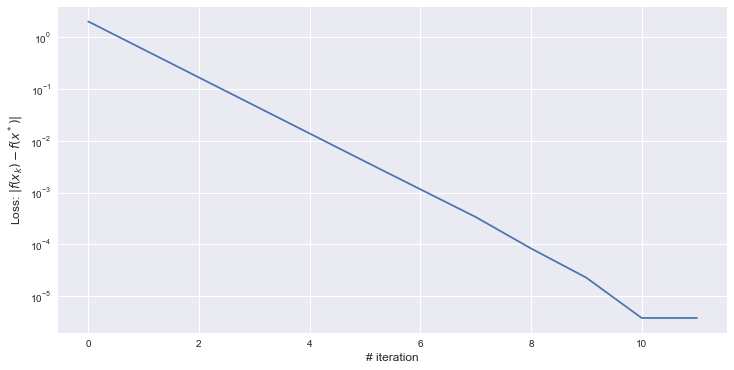

In [12]:
# GD algorithm
def gradient_descent(start_point, func, gradient, epsilon=0.01):
    """
    :param start_point: start point of GD
    :param func: map of plain function
    :param gradient: gradient map of plain function
    :param epsilon: threshold to stop the iteration
    :return: converge point, # iterations
    """
    assert isinstance(start_point, np.ndarray)  # assert that input start point is ndarray
    global Q, b, x_0     # claim the global varience
    x_k_1, iter_num, loss = start_point, 0, []
    xs = [x_k_1]

    while True:
        g_k = gradient(x_k_1).reshape([-1, 1])
        if np.sqrt(np.sum(g_k ** 2)) < epsilon:
            break
        alpha_k = np.dot(g_k.T, g_k).squeeze() / (np.dot(g_k.T, np.dot(Q, g_k))).squeeze()
        x_k_2 = x_k_1 - alpha_k * g_k
        iter_num += 1
        xs.append(x_k_2)
        loss.append(float(np.fabs(func(x_k_2) - func(x_0))))
        if np.fabs(func(x_k_2) - func(x_k_1)) < epsilon:
            break
        x_k_1 = x_k_2
    return xs, iter_num, loss
x0 = np.array([4,4], dtype="float32").reshape([-1, 1])
xs, iter_num, loss = gradient_descent(start_point=x0,
                                     func=func,
                                     gradient=gradient,
                                     epsilon=1e-6)
print(xs[-1])	# last point of the sequence
plt.style.use("seaborn")
plt.figure(figsize=[12, 6])
plt.plot(loss)
plt.xlabel("# iteration", fontsize=12)
plt.ylabel("Loss: $|f(x_k) - f(x^*)|$", fontsize=12)
plt.yscale("log")
plt.show()

1: start point:[[0.0], [0.0]], point after GD:[[4.99855], [5.99826]], loss:2.9518850226e-06, # iterations: 60
------------------------------------------------------------
2: start point:[[0.4], [0.0]], point after GD:[[4.99902], [5.99873]], loss:1.6873629107e-06, # iterations: 42
------------------------------------------------------------
3: start point:[[10.0], [0.0]], point after GD:[[5.0], [6.0]], loss:1.33369e-11, # iterations: 4
------------------------------------------------------------
4: start point:[[11.0], [0.0]], point after GD:[[5.0], [6.0]], loss:0.0, # iterations: 1
------------------------------------------------------------


C:\Users\yyq\AppData\Local\Temp\ipykernel_31976\1303589520.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  starting_points = [np.array([num, 0]).astype(np.float).reshape([-1, 1]) for num in [0.0, 0.4, 10.0, 11.0]]


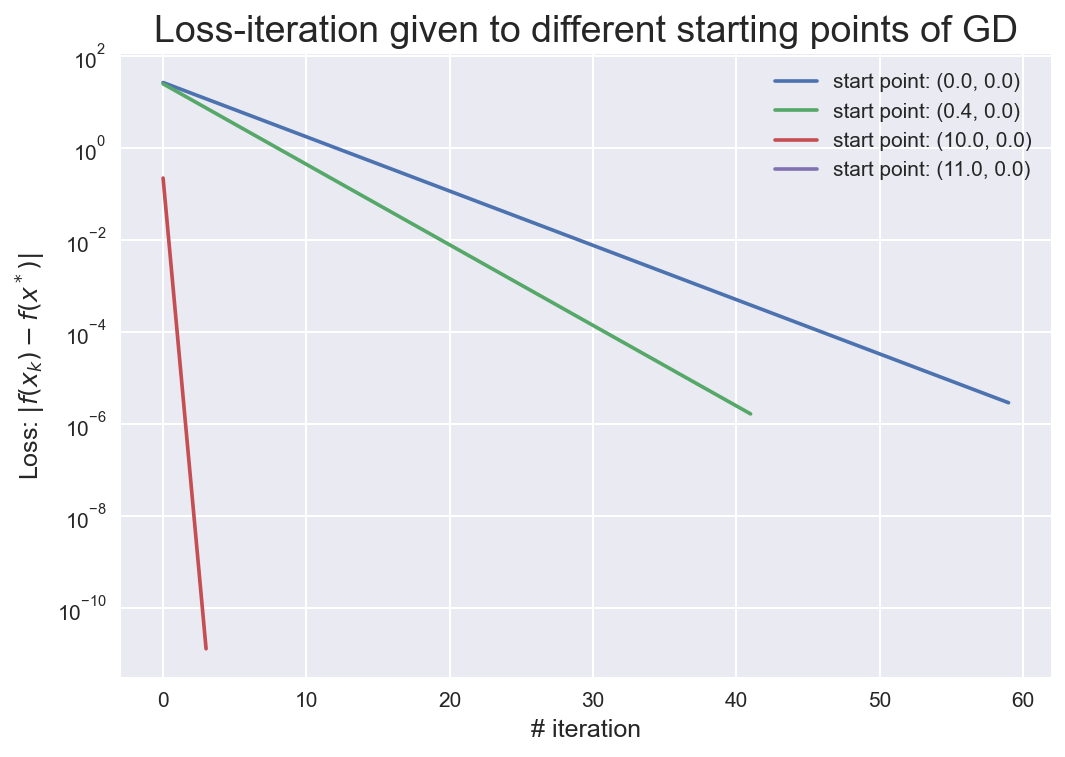

In [13]:
# create the list of all starting point x_0
starting_points = [np.array([num, 0]).astype(np.float).reshape([-1, 1]) for num in [0.0, 0.4, 10.0, 11.0]]

plt.figure(dpi=150)

xss = []
# implement GD
for idx, start_point in enumerate(starting_points):
    xs, iter_num, losses = gradient_descent(start_point, func, gradient, epsilon=1e-6)
    target_point = xs[-1]
    xss.append(xs)
    # plot the losses of $|f(x_k) - f(x^*)|$
    plt.plot(np.arange(len(losses)), np.array(losses), label=f"start point: ({start_point[0][0]}, {start_point[1][0]})")

    loss = np.fabs(func(target_point) - func(x_0))
    print(f"{idx + 1}: start point:{np.round(start_point, 5).tolist()}, "
          f"point after GD:{np.round(target_point, 5).tolist()}, "
          f"loss:{np.round(loss, 16)}, # iterations: {iter_num}")
    print("-" * 60)

plt.grid(True)
plt.legend()
plt.xlabel("# iteration", fontsize=12)
plt.ylabel("Loss: $|f(x_k) - f(x^*)|$", fontsize=12)
plt.yscale("log")
plt.title("Loss-iteration given to different starting points of GD", fontsize=18)
plt.show()

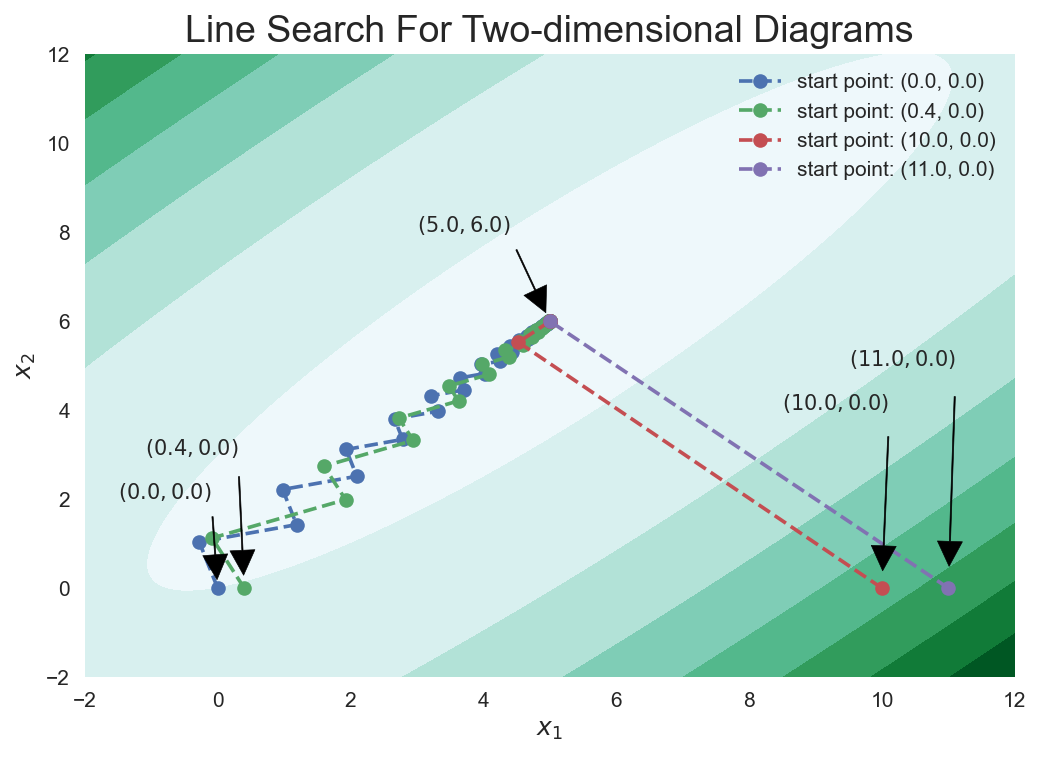

In [14]:
plt.figure(dpi=150)
X = np.linspace(-2, 12, 200)
Y = np.linspace(-2, 12, 200)
XX, YY = np.meshgrid(X, Y)
Z = [func(np.array([XX[i, j], YY[i, j]], dtype="float32").reshape([-1, 1])).tolist() for i in range(200) for j in range(200)]
Z = np.array(Z).reshape([200, 200])
plt.contourf(XX, YY, Z, cmap=plt.cm.BuGn)

plt.annotate(f"$(5.0, 6.0)$",
                 xy=(5, 6),
                 xytext=(5 - 2, 6 + 2),
                 arrowprops={
                     "color" : "black",
                     "shrink" : 0.1,
                     "width" : 0.6
                 })

# plot the scatter
for idx, start_point in enumerate(starting_points):
    xx = [xss[idx][i][0] for i, _ in enumerate(xss[idx])]
    yy = [xss[idx][i][1] for i, _ in enumerate(xss[idx])]
    plt.plot(xx, yy, "o--", label=f"start point: ({start_point[0][0]}, {start_point[1][0]})")
    # add some tips for start point
    plt.annotate(f"$({start_point[0][0]}, {start_point[1][0]})$",
                 xy=(start_point[0][0], start_point[1][0]),
                 xytext=(start_point[0][0] - 1.5, start_point[1][0] + idx + 2),
                 arrowprops={
                     "color" : "black",
                     "shrink" : 0.1,
                     "width" : 0.6
                 })

plt.grid(True)
plt.title("Line Search For Two-dimensional Diagrams", fontsize=18)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.legend()
plt.show()

C:\Users\yyq\AppData\Local\Temp\ipykernel_31976\1377856833.py:40: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  starting_points = [np.array([num, 0]).astype(np.float).reshape([-1, 1]) for num in [0.0, 0.4, 10.0, 11.0]]
C:\Users\yyq\AppData\Local\Temp\ipykernel_31976\1377856833.py:19: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  alpha_k = scipy.optimize.linesearch.line_search_wolfe2(f=func,


1: start point:[[0.0], [0.0]], point after GD:[[4.99855], [5.99826]], loss:2.9518850226e-06, # iterations: 60
------------------------------------------------------------
2: start point:[[0.4], [0.0]], point after GD:[[4.99902], [5.99873]], loss:1.6873629107e-06, # iterations: 42
------------------------------------------------------------
3: start point:[[10.0], [0.0]], point after GD:[[5.0], [6.0]], loss:0.0, # iterations: 3
------------------------------------------------------------
4: start point:[[11.0], [0.0]], point after GD:[[5.0], [6.0]], loss:0.0, # iterations: 1
------------------------------------------------------------


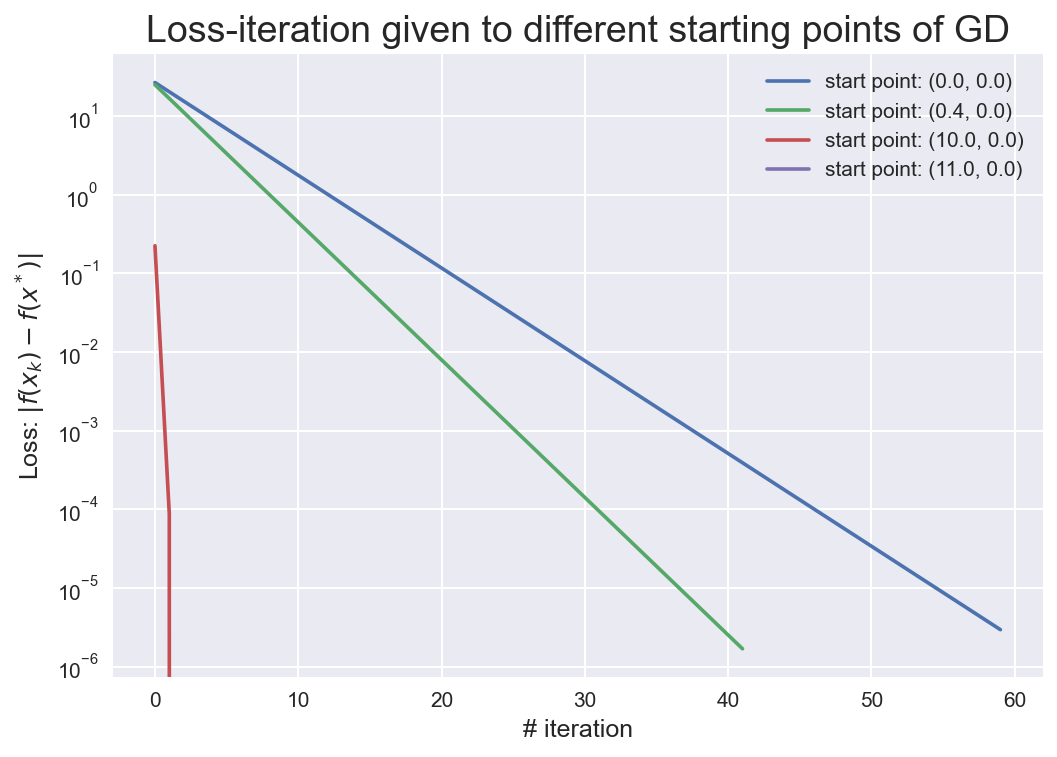

In [15]:
import scipy.optimize
def gradient_descent_wolfe(start_point, func, gradient, epsilon=1e-6):
    """
    :param start_point: start point of GD
    :param func: map of plain function
    :param gradient: gradient map of plain function
    :param epsilon: threshold to stop the iteration
    :return: converge point, # iterations
    """
    assert isinstance(start_point, np.ndarray)  # assert that input start point is ndarray
    global Q, b, x_0  # claim the global varience
    x_k_1, iter_num, loss = start_point, 0, []
    xs = [x_k_1]

    while True:
        g_k = gradient(x_k_1).reshape([-1, 1])
        if np.sqrt(np.sum(g_k ** 2)) < epsilon:
            break
        alpha_k = scipy.optimize.linesearch.line_search_wolfe2(f=func,
                                                myfprime=lambda x: np.reshape(np.dot(Q, x) + b, [1, -1]),
                                                xk=x_k_1,
                                                pk=-g_k)[0]
        if alpha_k == None:
            break
        elif isinstance(alpha_k, float):
            alpha_k = alpha_k
        else:
            alpha_k = alpha_k.squeeze()

        x_k_2 = x_k_1 - alpha_k * g_k
        iter_num += 1
        xs.append(x_k_2)
        loss.append(float(np.fabs(func(x_k_2) - func(x_0))))
        if np.fabs(func(x_k_2) - func(x_k_1)) < epsilon:
            break
        x_k_1 = x_k_2
    return xs, iter_num, loss

# create the list of all starting point x_0
starting_points = [np.array([num, 0]).astype(np.float).reshape([-1, 1]) for num in [0.0, 0.4, 10.0, 11.0]]

plt.figure(dpi=150)

xss = []
# implement GD
for idx, start_point in enumerate(starting_points):
    xs, iter_num, losses = gradient_descent_wolfe(start_point, func, gradient, epsilon=1e-6)
    target_point = xs[-1]
    xss.append(xs)
    # plot the losses of $|f(x_k) - f(x^*)|$
    plt.plot(np.arange(len(losses)), np.array(losses), label=f"start point: ({start_point[0][0]}, {start_point[1][0]})")

    loss = np.fabs(func(target_point) - func(x_0))
    print(f"{idx + 1}: start point:{np.round(start_point, 5).tolist()}, "
          f"point after GD:{np.round(target_point, 5).tolist()}, "
          f"loss:{np.round(loss, 16)}, # iterations: {iter_num}")
    print("-" * 60)

plt.grid(True)
plt.legend()
plt.xlabel("# iteration", fontsize=12)
plt.ylabel("Loss: $|f(x_k) - f(x^*)|$", fontsize=12)
plt.yscale("log")
plt.title("Loss-iteration given to different starting points of GD", fontsize=18)
plt.show()

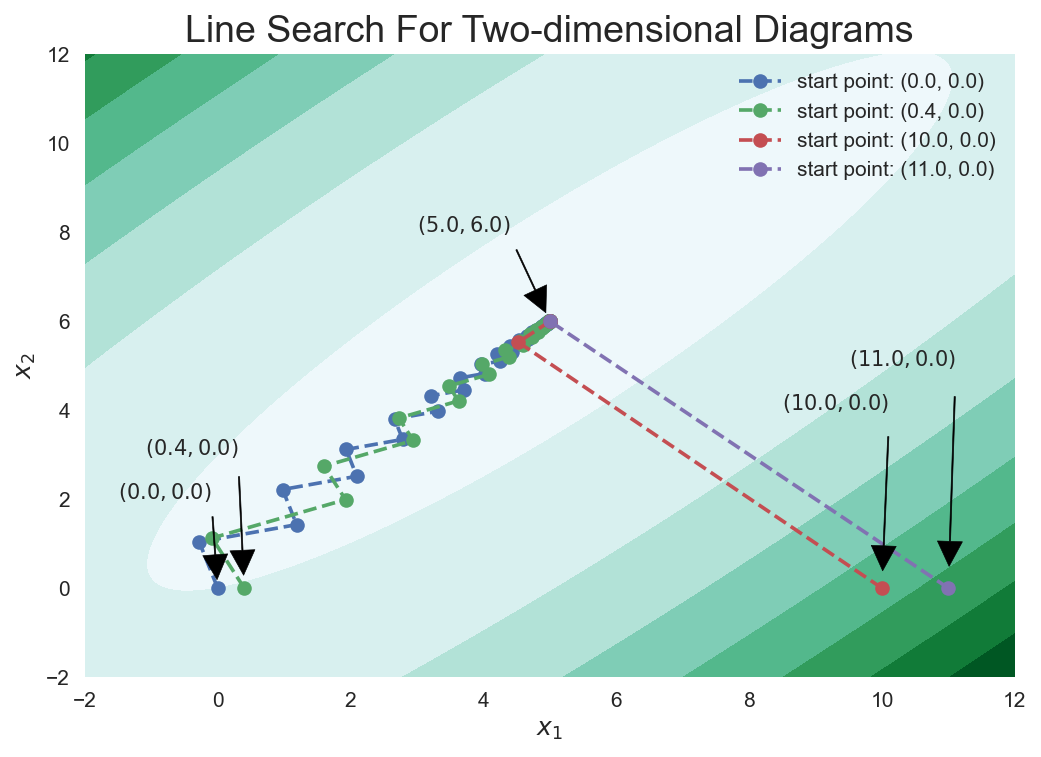

In [16]:
plt.figure(dpi=150)
X = np.linspace(-2, 12, 200)
Y = np.linspace(-2, 12, 200)
XX, YY = np.meshgrid(X, Y)
Z = [func(np.array([XX[i, j], YY[i, j]], dtype="float32").reshape([-1, 1])).tolist() for i in range(200) for j in range(200)]
Z = np.array(Z).reshape([200, 200])
plt.contourf(XX, YY, Z, cmap=plt.cm.BuGn)

plt.annotate(f"$(5.0, 6.0)$",
                 xy=(5, 6),
                 xytext=(5 - 2, 6 + 2),
                 arrowprops={
                     "color" : "black",
                     "shrink" : 0.1,
                     "width" : 0.6
                 })

# plot the scatter
for idx, start_point in enumerate(starting_points):
    xx = [xss[idx][i][0] for i, _ in enumerate(xss[idx])]
    yy = [xss[idx][i][1] for i, _ in enumerate(xss[idx])]
    plt.plot(xx, yy, "o--", label=f"start point: ({start_point[0][0]}, {start_point[1][0]})")
    # add some tips for start point
    plt.annotate(f"$({start_point[0][0]}, {start_point[1][0]})$",
                 xy=(start_point[0][0], start_point[1][0]),
                 xytext=(start_point[0][0] - 1.5, start_point[1][0] + idx + 2),
                 arrowprops={
                     "color" : "black",
                     "shrink" : 0.1,
                     "width" : 0.6
                 })

plt.grid(True)
plt.title("Line Search For Two-dimensional Diagrams", fontsize=18)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12)
plt.legend()
plt.show()

Barzilai-Borwein算法
$d^k=-\nabla f(x^k)$
利用当前迭代点与上一步迭代点的信息确定步长
$\alpha_k^{BB1}=\frac{s_{k-1}^Ts_{k-1}}{s_{k-1}^Ty_{k-1}}$    $\alpha_k^{BB2}=\frac{s_{k-1}^Ty_{k-1}}{y_{k-1}^Ty_{k-1}}$
$ s_{k-1}=x_k-x_{k-1} \\ y_{k-1}=g_k-g_{k-1}$

$x^{k+1}=x^k-\alpha\nabla f{x^k}$可以得出$x^{k+1}=x^k-D_k\nabla f{x^k},D_k=\alpha_kI$
$D_k$具有逆牛顿性质
$\alpha_k=argmin {\begin{Vmatrix}D_k^{-1}s_{k-1}-y_{k-1}\end{Vmatrix}}_2^2$
$\alpha_k=argmin {\begin{Vmatrix}s_{k-1}-D_ky_{k-1}\end{Vmatrix}}_2^2$

长步长是寻找当前迭代的前一步精确步长
$\alpha_k^{BB1}=arg\min_\alpha f(x_{k-1}-\alpha \nabla f(x_{k-1}))$
对于正定二次函数
$\alpha_k^{BB1}=\frac{s_{k-1}^Ts_{k-1}}{s_{k-1}^Ty_{k-1}}=\frac{g_{k-1}^Tg_{k-1}}{g_{k-1}^TGg_{k-1}}$
最速下降法
$\alpha_k^{SD}=\frac{g_{k}^Tg_{k}}{g_{k}^TGg_{k}}$

短步长是寻找当前迭代的前一步在目前搜索方向上的梯度最小值。
$\alpha_k^{BB2}=arg\min_\alpha {\begin{Vmatrix}\nabla f(x_{k-1}-\alpha \nabla f (x_{k-1}))\end{Vmatrix}}^2$
$\alpha_k^{MG}=\frac{g_{k}^TGg_{k}}{g_{k}^TG^2g_{k}}$




在Wolfe条件下，BB长步长和短步长恒正
BB算法的保障值：$\tilde{\alpha}_k^0=\frac{2(f_k-f_{k-1})}{\varphi'(0)}$ 插值法
对于一般问题，BB步长并不每一次都直接使用，做如下处理：
$\alpha_k^0=\max(\min(\alpha_k^{BB2},\omega_2\tilde{\alpha}_k^0),\omega_1\tilde{\alpha}_k^0)$
BB算法是非单调方法，可以配合非单调收敛准则以获得更好实际效果。

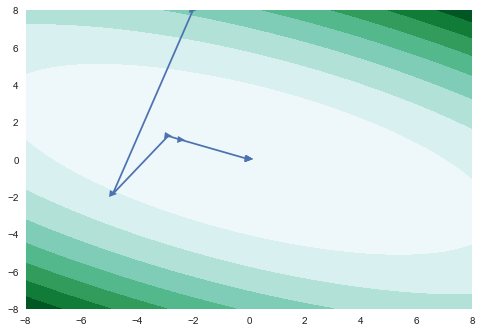

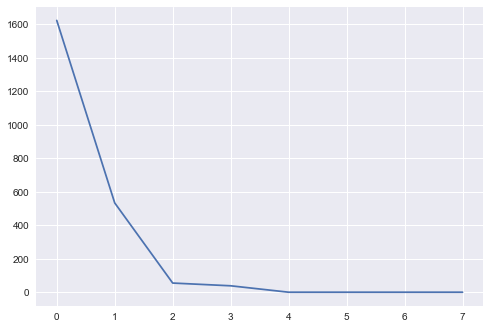

In [17]:
class BBLineSearch:
    def __init__(self,f,df,alpha,M,c1,beta,eps,n_iters=100):
        self.f=f
        self.x=[]
        self.fx=[]
        self.df=df
        self.alpha=alpha
        self.M=M
        self.c1=c1
        self.beta=beta
        self.eps=eps
        self.n_iters=n_iters

    def go_down(self,x):
        alpha=self.alpha
        self.x.append(x)
        self.fx.append(self.f(x))
        for k in range(self.n_iters):
            if np.linalg.norm(self.df(x))<=self.eps:
                break
            while self.f(x-alpha*self.df(x))>=max(self.fx[-min(k,self.M)-1:])-self.c1*alpha*np.linalg.norm(self.df(x))**2:
                alpha=self.beta*alpha
            #alpha_baozhang=2*(self.fx[-1]-self.fx[-2])/(self.df(x).T*(-self.df(x))) # 里面的omega又不说明白，我只能参考原书配的程序
            g_old=self.df(x)
            x=x-alpha*self.df(x)
            # x=np.clip(x,-10,10)
            # print(x,alpha,self.df(x))
            self.x.append(x)
            self.fx.append(self.f(x))
            g=self.df(x)
            s_k_minu_1=self.x[-1]-self.x[-2]
            y_k_minus_1=g-g_old
            alpha=self.alpha
            if np.abs(s_k_minu_1.T@y_k_minus_1)>0:
                if k%2==0:
                    alpha=s_k_minu_1.T@y_k_minus_1/(y_k_minus_1.T@y_k_minus_1) # bb2
                else:
                    alpha=s_k_minu_1.T@s_k_minu_1/(s_k_minu_1.T@y_k_minus_1) # bb1
                alpha=np.clip(alpha,a_min=1e-20,a_max=1e20)
                # print(alpha)
        return x

Q=np.array([
    [10,10],
    [11,30]
])
def f(x):
    return x.T@Q@x

def df(x):
    return (Q+Q.T)@x

bb_stepper=BBLineSearch(alpha=1,f=f,df=df,beta=0.8,c1=0.1,M=50,eps=1e-3)
x=np.array([-2,8])
bb_stepper.go_down(x)
# print(bb_stepper.x)
guiji=np.array(bb_stepper.x)
plt.plot(guiji[:,0],guiji[:,1],marker='>')

X = np.linspace(-8, 8, 200)
Y = np.linspace(-8, 8, 200)
XX, YY = np.meshgrid(X, Y)
Z = [f(np.array([XX[i, j], YY[i, j]], dtype="float32").reshape([-1, 1])).tolist() for i in range(200) for j in range(200)]
Z = np.array(Z).reshape([200, 200])
plt.contourf(XX, YY, Z, cmap=plt.cm.BuGn)
plt.show()
plt.plot(bb_stepper.fx)

### 共轭方向法
简单来说，共轭方向法就是求出一些正交的方向，之后在分别在这些方向上精确一维搜索最优值。
设G是n*n对称正定矩阵，$d^1,d^2$是n维非零向量，如果
${d^1}^TGd^2=0$
则称$d^1$，$d^2$是G-共轭的。
共轭是正交的推广。

共轭方向的优势是二次终止性,对于正定二次函数，共轭方向法最多经n步精确线搜索终止。且每一个$x_{i+1}$都是$f(x)$在$x_0$和方向$d^1,d^2,···d^i$所张成的线性流形中的极小点。
$$
\{x|x=x_0+\sum_{j=0}^i\alpha_j d_j ,\forall \alpha_j
\}
$$

Gram-Schimidt共轭化过程
1、给定n维线性无关向量组$p^0,p^1,···p^{n-1}$,令$d^0=p^0,k:=0$
2、$d^{k+1}=p^{k+1}-\sum_{j=0}^{k} \frac{\left(d^{j}\right)^{T} G p^{k+1}}{\left(d^{j}\right)^{T} G\left(d^{j}\right)}$
3、若k=n-2，计算终止，否则令k:k+1，转1

In [18]:
def gs_gonge(p,G):
    n=len(p)
    p=np.array([p_/np.linalg.norm(p_) for p_ in p])
    d=np.zeros_like(p)
    d[0]=p[0]
    for i in range(1,n):
        sum_i=0
        for j in range(i):
            print(i,j,p[i],d[j],sum_i)
            sum_i+=(d[j].T@G@p[i])/(d[j].T@G@d[j])
        d[i]=p[i]-sum_i
    return d
# 误区！！！ 输入的p向量之间也需要是线性无关的！
print(gs_gonge([[1,2],[2,3]],[[1,0],[0,1]]))

1 0 [0.5547002  0.83205029] [0.4472136  0.89442719] 0
[[ 0.4472136   0.89442719]
 [-0.43757768 -0.16022758]]


#### FR共轭梯度法
$ \beta_{k-1}^{F R}=\frac{\left\|g_{k}\right\|_{2}^{2}}{\left\|g_{k-1}\right\|_{2}^{2}}$

PRP的稍微改一点点

$\beta_{k-1}^{P R P}=\frac{g_{k}^{T}\left(g_{k}-g_{k-1}\right)}{\left\|g_{k-1}\right\|^{2}}$

[2.  0.5] [-1. -2.] 0.24999999998936626
[4. 2.] [ 2.12674323e-10 -4.25348645e-10] 1.0


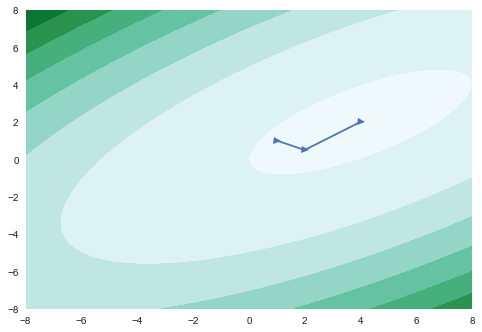

In [19]:
class FRGradient:
    def __init__(self,f,df,n_iter=100,eps=1e-3):
        self.f=f
        self.df=df
        self.x_l=None
        self.n_iter=n_iter
        self.eps=eps
    def go_down(self,x):
        x_dim=len(x)
        g_l=[]
        d_l=[]
        x_l=[x]
        shoulian=False
        for it in range(self.n_iter):
            for i in range(x_dim):
                g=self.df(x)
                g_l.append(g)
                d=-g
                if i!=0 or it !=0:

                    beta=(np.linalg.norm(g)/np.linalg.norm(g_l[-2]))**2
                    d=d+beta*d_l[-1]
                d_l.append(d)
                alpha=getStepLengthByNewton_f(x,d,self.f)
                x=x+alpha*d
                x_l.append(x)
                print(x,self.df(x),alpha)
                if np.linalg.norm(self.df(x))<self.eps:
                    shoulian=True
                if shoulian:
                    break
            if shoulian:
                break

        self.x_l=x_l
        return x



def getStepLengthByNewton_f(array_xy, array_d,f,c_max=100):
    '''
    采用牛顿法，精确线性搜索确定移动步长
    '''
    a0 = 1.0           #初始猜测值
    e0 = 1e-6          #退出搜索循环的条件
    delta_a = 1e-6     #对a作差分的小量
    c=0
    while(1):
        new_a = array_xy + a0*array_d
        new_a_l = array_xy + (a0-delta_a)*array_d
        new_a_h = array_xy + (a0+delta_a)*array_d
        diff_a0 = (f(new_a_h) - f(new_a_l))/(2.0*delta_a)
        if np.abs(diff_a0) < e0:
            break
        ddiff_a0 = (f(new_a_h) + f(new_a_l) - 2.0*f(new_a))/(delta_a*delta_a)
        a0 = a0 - diff_a0/ddiff_a0
        c+=1
        if c>=c_max: # 不能让他循环太久，成死程序了，容易出错。。。
            break
    return a0


def f(x):
    return x[0]**2+2*x[1]**2-4*x[0]-2*x[0]*x[1]

def df(x):
    return np.array([2*x[0]-2*x[1]-4,4*x[1]-2*x[0]])

fr_Gradient=FRGradient(f=f, df=df, )
x=np.array([1,1])
fr_Gradient.go_down(x)
# print(bb_stepper.x)
guiji=np.array(fr_Gradient.x_l)
plt.plot(guiji[:,0],guiji[:,1],marker='>')
# print(guiji)
X = np.linspace(-8, 8, 200)
Y = np.linspace(-8, 8, 200)
XX, YY = np.meshgrid(X, Y)
Z = [f(np.array([XX[i, j], YY[i, j]], dtype="float32").reshape([-1, 1])).tolist() for i in range(200) for j in range(200)]
Z = np.array(Z).reshape([200, 200])
plt.contourf(XX, YY, Z, cmap=plt.cm.BuGn)
plt.show()
# plt.plot(fr_Gradient.fx)


### 经过艰苦的奋战，终于到了牛顿法，有点激动
经典的Newton法，利用目标函数的二阶导数信息构造下降方向，有望获得更优秀算法。
在当前迭代点泰勒展开目标函数，选择合适下降方向
$f\left(x^{k}+d^{k}\right)=f\left(x^{k}\right)+\nabla f\left(x^{k}\right)^{T} d^{k}+\frac{1}{2}\left(d^{k}\right)^{T} \nabla^{2} f\left(x^{k}\right) d^{k}+o\left(\left\|d^{k}\right\|^{2}\right)$


$x^{k+1}=x^{k}+d^{k}$

忽略高阶项，关于方向$d^k$极小化,得到牛顿方程
$\nabla^{2} f\left(x^{k}\right) d^{k}=-\nabla f\left(x^{k}\right)
$
牛顿方法就是把$d^k$作为迭代方向的优化方法
$d^k=-{[\nabla^2 f(x^k)]}^{-1}\nabla f(x^k)$


[[-100.          -50.        ]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]
 [   1.66666667    0.33333333]]


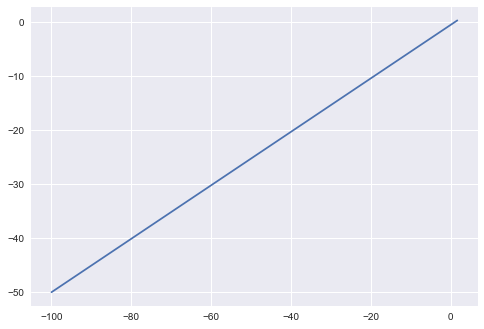

[[ 4.  4.]
 [ 4. 10.]] h


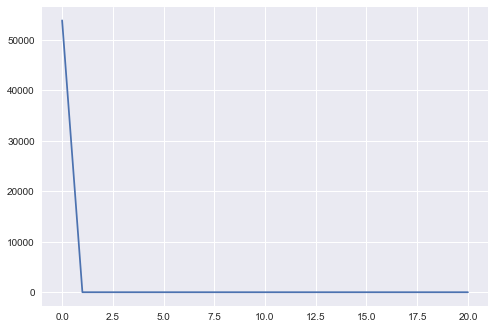

In [49]:
import sympy
# gradient = lambda f, v: Matrix([f]).jacobian(v)
# gradient(eq, v)
# hessian(eq, v)

class Functions:
    def __init__(self,sym_func,dtype=np.float64):
        self.sym_func=sym_func
        self.symbols = list(sympy.ordered(self.sym_func.free_symbols))
        self.sym_gradient=None
        self.sym_hessian=None
        self.dtype=dtype

    def get_sym_hessian(self):
        if self.sym_hessian is None:
            self.sym_hessian=sympy.hessian(self.sym_func, self.symbols)
        return self.sym_hessian

    def get_sym_gradient(self):
        if self.sym_gradient is None:
            gradient = lambda f, value: sympy.Matrix([f]).jacobian(self.symbols)
            self.sym_gradient= gradient(self.sym_func, self.symbols)
        return self.sym_gradient

    def calc_val(self,x):
        x=np.array(x,dtype=self.dtype)
        return np.array(self.sym_func.evalf(subs=dict(zip(self.symbols, x))),dtype=self.dtype)

    def calc_gradient(self,x):
        x=np.array(x,dtype=self.dtype)
        return np.array(self.get_sym_gradient().evalf(subs=dict(zip(self.symbols, x))),dtype=self.dtype)

    def calc_hessian(self,x):
        x=np.array(x,dtype=self.dtype)
        return np.array(self.get_sym_hessian().evalf(subs=dict(zip(self.symbols, x))),dtype=self.dtype)


x1,x2=sympy.symbols('x1 x2')


func_obj=Functions(sym_func=(x1+2*x2-2)**2+(x1-2)**2+(x2-1)**2)
x=np.array([-100,-50])
xl=[x]
for _ in range(20):# 其实正定二次的，只要一次就收敛了，但是搞大点，主要是高阶时好玩
    hessian_m=np.array(func_obj.calc_hessian(x),dtype=np.float64)
    gradient=np.array(func_obj.calc_gradient(x),dtype=np.float64).reshape([-1])
    d=-np.linalg.inv(hessian_m)@gradient
    # print(d,'d')
    assert x.shape==d.shape,' 形状出错'
    x=x+d
    xl.append(x)
xl=np.array(xl)
plt.plot(xl[:,0],xl[:,1])
print(xl)
plt.show()
plt.plot([func_obj.calc_val(x) for x in xl])
print(func_obj.calc_hessian(x),'h')

修正Newton法：修正Hesse阵，解决Hesse阵非正定问题
引入正定矩阵 $B^{k} \triangleq \nabla^{2} f\left(x^{k}\right)+E^{k}$,$E^{k}$是修正矩阵
简单来说就是确定修正矩阵让修正的Hesse矩阵正定，且条件数较小

#### 隐式修正，利用Cholesky分解算法
$\nabla^{2} f\left(x^{k}\right)+E^{k}=L D L^{T}$

算法步骤：

$\text { 计算: } \gamma_{j}=\left|g_{j j}-\sum_{s=1}^{j-1} d_{s s} l_{j s}^{2}\right| \quad \text { 取 } \quad \bar{d}=\max \left\{\gamma_{j}, \delta\right\}$

检查：$\left|l_{i j} \sqrt{d_{j j}}\right| \leq \beta$是否满足
满足则接受$d_{jj}=\bar{d}$，并按照分解算法计算分解因子
不满足则 $d_{j j}=\left|g_{j j}+e_{j j}-\sum_{s=1}^{j-1} d_{s s} l_{j s}^{2}\right|$
选择$e_{jj}$，使得$\max \left|l_{i j} \sqrt{d_{i j}}\right|=\beta$,并按照分解算法计算分解因子。

In [21]:
#修正cholesky分解

def modified_cholesky_decomposition(A):
    n = A.shape[0]
    dia = np.diagonal(A)#以列表存储矩阵对角元素
    delta = np.array(max(abs(dia)))
    #delta = (max(abs(dia))).clone().detach()
    U = np.triu(A) - np.diag(dia)#取出非对角上三角函数
    #print(abs(U).max())
    be = max(delta,abs(U).max()/(n**2 - 1))
    beta = (1/be)#根据A给出beta^2分之一的值
    C = np.zeros_like(A);L = np.eye(n,n);D = np.zeros_like(A)
    d = np.zeros(n);theta = np.zeros(n)
    #----------------------
    d[0] = max(delta,abs(A[0,0]))
    for i in range(1,n):
        C[i,0] = A[i,0]
    theta[0] = max(abs(C[:,0]))#theta_0
    D[0,0] = max(beta*theta[0]**2,d[0])
    for i in range(1,n):
        L[i,0] = C[i,0]/D[0,0]
    #------------------------------
    for j in range(1,n):
        for i in range(j+1,n):
            for r in range(j):
                d[j] = A[j,j] - C[j,r]**2/d[r]
                C[i,j] = A[i,j] - L[j,r]*C[i,r]
        d[j] = max(delta,abs(d[j]))
        theta[j] = max(abs(C[:,j]))
        D[j,j] = max(d[j],beta*theta[j]**2)
        for m in range(j + 1,n):
            L[m,j] = C[m,j]/D[j,j]
    #print(beta)
    return L,D
A = np.eye(3,3)
A[0,1] = 1.0;A[0,2] = 2.0
A[1,0] = 1;A[1,1] += 1e-7;A[1,2] = 3
A[2,0] = 2;A[2,1] = 3
print(A)
L,D = modified_cholesky_decomposition(A)
print(L@D@L.T - A)

[[1.        1.        2.       ]
 [1.        1.0000001 3.       ]
 [2.        3.        1.       ]]
[[2.9999996  0.         0.        ]
 [0.         5.49999905 0.        ]
 [0.         0.         2.0000003 ]]


In [22]:

def is_pos_def(x):
    x=np.array(x,dtype=np.float64)
    return np.all(np.linalg.eigvals(x) > 0)

def modify_newton(x,miu=1e-4,max_miu=1e-1,method='LM',eps=1e-8):
    x=np.array(x,dtype=np.float64)
    I=np.eye(x.shape[0])
    if is_pos_def(x):
        return x

    if method=='LM':
        # 显式
        x+=miu*I
        while not is_pos_def(x):
            miu*=2
            miu=np.clip(miu,a_min=0,a_max=max_miu)
            x+=miu*I
        return x
    elif method=='Gerschgorin':
        # 是不是对应这个不知道诶
        # 想法就是稍微比负特征值的模最大值大点。
        min_val=np.min(np.linalg.eigvals(x))
        x+=(abs(min_val)+eps)*I
        return x
    elif method=='Cholesky':
        # 隐式修正：利用Gill和Murray提出的修改 Cholesky 分解算法
        L,D=modified_cholesky_decomposition(x)
        return L@D@L.T


In [23]:
# H=np.array(func_obj.calc_hessian(x),dtype=np.float64)
H=np.array([[5,10],[1,-1]],dtype=np.float64)
print(np.linalg.eigvals(H))
print(H)
print(modify_newton(H,method='Cholesky'))

[ 6.35889894 -2.35889894]
[[ 5. 10.]
 [ 1. -1.]]
[[5.  1. ]
 [1.  5.2]]


[[ 1.00000000e+00 -2.00000000e+00]
 [ 1.81250000e+00 -1.25000000e-01]
 [ 2.33984375e+00  3.90625000e-02]
 [ 2.81372070e+00 -1.17675781e-01]
 [ 3.27757263e+00 -3.34564209e-01]
 [ 3.73954487e+00 -5.62730789e-01]
 [ 4.20116466e+00 -7.93012023e-01]
 [ 4.66271837e+00 -1.02368975e+00]
 [ 5.12425970e+00 -1.25444183e+00]
 [ 5.58579869e+00 -1.48520784e+00]
 [ 6.04733725e+00 -1.71597647e+00]
 [ 6.50887574e+00 -1.94674559e+00]
 [ 6.97041420e+00 -2.17751480e+00]
 [ 7.43195266e+00 -2.40828402e+00]
 [ 7.89349112e+00 -2.63905325e+00]
 [ 8.35502959e+00 -2.86982249e+00]
 [ 8.81656805e+00 -3.10059172e+00]
 [ 9.27810651e+00 -3.33136095e+00]
 [ 9.73964497e+00 -3.56213018e+00]
 [ 1.02011834e+01 -3.79289941e+00]
 [ 1.06627219e+01 -4.02366864e+00]
 [ 1.11242604e+01 -4.25443787e+00]
 [ 1.15857988e+01 -4.48520710e+00]
 [ 1.20473373e+01 -4.71597633e+00]
 [ 1.25088757e+01 -4.94674556e+00]
 [ 1.29704142e+01 -5.17751479e+00]
 [ 1.34319527e+01 -5.40828402e+00]
 [ 1.38934911e+01 -5.63905325e+00]
 [ 1.43550296e+01 -5

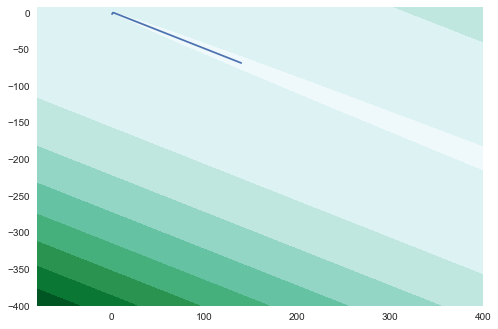

[[2. 4.]
 [4. 8.]] h


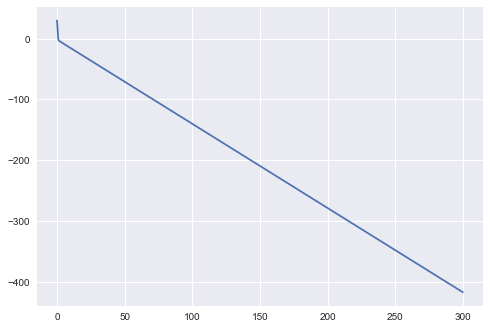

In [90]:

x1,x2=sympy.symbols('x1 x2')


func_obj=Functions(sym_func=(x1+2*x2-2)**2-(x1**2+x2**2)+(x1-2)**2+(x2-1)**2)
x=np.array([1,-2])
xl=[x]
for _ in range(300):# 其实正定二次的，只要一次就收敛了，但是搞大点，主要是高阶时好玩
    hessian_m=np.array(func_obj.calc_hessian(x),dtype=np.float64)
    gradient=np.array(func_obj.calc_gradient(x),dtype=np.float64).reshape([-1])
    hessian_m=modify_newton(hessian_m,method='Cholesky')
    d=-np.linalg.inv(hessian_m)@gradient
    # print(d,'d')
    assert x.shape==d.shape,' 形状出错'
    x=x+d
    xl.append(x)
xl=np.array(xl)
plt.plot(xl[:,0],xl[:,1])
print(xl)
func_obj.calc_val([1,2])
X = np.linspace(-80, 400, 200)
Y = np.linspace(-400, 8, 200)
XX, YY = np.meshgrid(X, Y)
Z = [func_obj.calc_val(np.array([XX[i, j], YY[i, j]], dtype="float64")) for i in range(200) for j in range(200)]
Z = np.array(Z).reshape([200, 200])
plt.contourf(XX, YY, Z, cmap=plt.cm.BuGn)

plt.show()
plt.plot([func_obj.calc_val(x) for x in xl])
print(func_obj.calc_hessian(x),'h')

##### 也可以用割线方程
$B_{k+1} \approx \nabla^{2} f\left(x^{k+1}\right) \quad H_{k+1} \approx\left(\nabla^{2} f\left(x^{k+1}\right)\right)^{-1}$

拟Newton条件/割线方程 $B_{k+1} s_{k}=y_{k}$

曲率条件$ 0<s_{k}^{T} B_{k+1} s_{k}=s_{k}^{T} y_{k} \quad
 s_{k}^{T} y_{k}>0 $

对于一般函数，曲率条件未必成立，需要使用Wolfe准则线搜索来保证
$\nabla f\left(x^{k+1}\right)^{T} s_{k} \geq c_{2} \nabla f\left(x^{k}\right)^{T} s_{k}$ Wolfe准则

$\nabla f\left(x^{k+1}\right)^{T} s_{k}-\nabla f\left(x^{k}\right)^{T} s_{k} \geq c_{2} \nabla f\left(x^{k}\right)^{T} s_{k}-\nabla f\left(x^{k}\right)^{T} s_{k}$

$y_{k}^{T} s_{k} \geq\left(c_{2}-1\right) \nabla f\left(x^{k}\right)^{T} s_{k}>0$

利用目标函数一阶导数信息进行近似；
近似矩阵在迭代中生成，取初始矩阵$H_{0}=I \quad\left(B_{0}=I\right)$
$H_{k+1}=H_{k}+\Delta H_{k} \quad B_{k+1}=B_{k}+\Delta B_{k}$
修正矩阵$\Delta H_{k},\Delta B_{k}$取法不同，导致不同的拟Newton计算格式。
修正矩阵计算格式要求：简单、计算量小、计算效率高
秩1校正：修正矩阵的秩为1
要求矩阵对称
$H_{k+1}=H_{k}+\frac{1}{\left(s_{k}-H_{k} y_{k}\right)^{T} y_{k}}\left(s_{k}-H_{k} y_{k}\right)\left(s_{k}-H_{k} y_{k}\right)^{T}$

秩2校正，也叫DFP校正，也叫变尺度法
对于使用精确线搜索或Wolfe准则的DFP方法，有$s_{k}^{T} y_{k}>0$
$g_{k+1}^{T} d_{k}=0 \quad s_{k}=\alpha_{k} d_{k}=-\alpha_{k} H_{k} g_{k} \quad s_{k}^{T} y_{k}=s_{k}^{T}\left(g_{k+1}-g_{k}\right)>0$
$H_{k+1}=H_{k}+\frac{s_{k} s_{k}^{T}}{s_{k}^{T} y_{k}}-\frac{H_{k} y_{k} y_{k}^{T} H_{k}}{y_{k}^{T} H_{k} y_{k}}$


In [139]:
def calc_accurate_alpha(x,dk,f,ratio=0.618,eps=1e-8,max_iter=10000):
    low_alpha,high_alpha=calc_init_points(x,dk,f)
    cishu=0
    while 1:
        low=low_alpha+(high_alpha-low_alpha)*(1-ratio)
        high=low_alpha+(high_alpha-low_alpha)*ratio
        f_low=f(x+low*dk)
        f_high=f(x+high*dk)
        if f_low<f_high:
            high_alpha=high
        else:
            low_alpha=low
        cishu+=1
        if cishu%1000==0:
            print(f'calc_accurate_alpha 运行了{cishu+1}次，calc_accurate_alpha 函数运行太久，可能是问题本身不收敛')
            print(low,high,f_low,f_high)
        if cishu>=max_iter:
            print('calc_accurate_alpha 函数运行太久，可能是问题本身不收敛')
            break
        if high_alpha-low_alpha<eps:
            break
    return (high_alpha+low_alpha)/2

def calc_init_points(x,dk,f):
    def f_alpha(alpha):
        return f(x+alpha*dk)
    alpha=0.001

    k=2
    a, fa = 0,  f_alpha(0)
    b, fb = alpha,f_alpha(alpha)

    if fb > fa:
        a,b = b,a
        fa, fb = fa,fb
        alpha = -alpha

    while True:
        c, fc = b+alpha, f_alpha(b+alpha)

        if fc > fb:
            if a < c:
                return [a,c]
            else:
                return [c,a]
        a,fa,b,fb = b,fb,c,fc
        alpha*=k







[[ 1.         -2.        ]
 [-0.16904419 -1.41547791]
 [ 0.99999999  0.92261044]
 [ 1.0325667   1.06330569]
 [ 1.03066009  1.06452891]
 [ 1.00272566  1.01117277]
 [ 0.99649562  0.99785663]
 [ 0.99393501  0.98866389]
 [ 0.99502795  0.98935045]
 [ 0.99919089  0.99713119]
 [ 1.00069839  1.00034922]
 [ 1.0012511   1.00234887]
 [ 1.00100755  1.00217337]
 [ 1.00016891  1.00060275]
 [ 0.99980548  0.99980201]
 [ 0.99970541  0.99944961]
 [ 0.99973253  0.99944175]
 [ 0.99997972  0.99991404]
 [ 0.99997909  0.99991284]
 [ 1.00000931  1.00001733]
 [ 1.00000931  1.00001733]
 [ 1.00000931  1.00001733]]


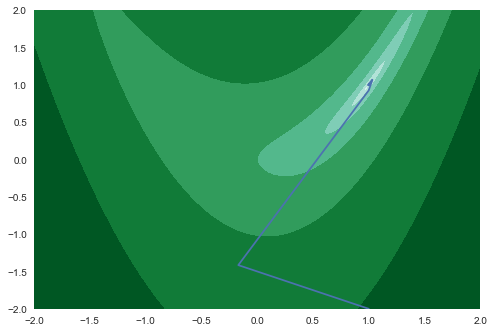

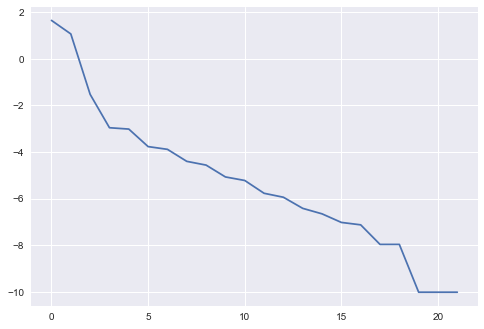

In [142]:
class DFP:
    def __init__(self,f,ratio,alpha,c,eps=1e-7,n_iter=100):
        self.f=f
        self.ratio=ratio
        self.alpha=alpha
        self.c=c
        self.eps=eps
        self.n_iter=n_iter
        self.xl=[]
        self.fxl=[]

    # def panduan(self,x,fx,alpha,dk,gk):
    #     # Wolfe准则 这样不收敛
    #     x=np.reshape(x,[-1,])
    #     dk=np.reshape(dk,[-1,])
    #     gk=np.reshape(gk,[-1,])
    #     a=self.f.calc_val(x+alpha*dk)<=fx+self.c*alpha*gk.T@dk
    #     b=self.f.calc_gradient(x+alpha*dk).reshape([-1,]).T@dk>=0.2*gk.T@dk
    #     return a and b

    def not_accurate_line_search(self,x,dk,gk):
        # 没玩收敛。。。
        alpha=self.alpha
        m=0
        max_cishu=1000
        fx=self.f.calc_val(x)
        while not self.panduan(x=x,fx=fx,alpha=alpha,dk=dk,gk=gk):
            if m>=max_cishu:
                break
            m+=1
            alpha*= self.ratio
        return alpha,m

    def accurate_line_search(self,x,dk):
        alpha=calc_accurate_alpha(x,dk,self.f.calc_val)
        return alpha

    def modify(self,H,s,y):
        s=s.reshape([-1,1])
        y=y.reshape([-1,1])
        return H+s@s.T/(s.T@y)-(H@y@y.T@H)/(y.T@H@y)

    def go_down(self,x):
        xl=[]
        fxl=[]
        var_num=len(x)
        Hk=np.eye(var_num)
        gk=0
        alpha=self.alpha
        for k in range(self.n_iter):
            old_gk=gk
            gk=self.f.calc_gradient(x).reshape([-1])
            # print(gk,alpha,x,'a')
            xl.append(x)
            fxl.append(self.f.calc_val(x))
            if np.linalg.norm(gk)<=self.eps:
                break
            dk=-Hk@gk
            alpha= self.accurate_line_search(x,dk)
            yk=gk-old_gk
            sk=alpha*dk
            if yk.T@sk==0:
                break
            x=x+sk
            Hk=self.modify(Hk,sk,yk)
        self.xl=xl
        self.fxl=fxl
        return x


x1,x2=sympy.symbols('x1 x2')


func_obj=Functions(sym_func=(1 - x1)**2 + 5*(x2 - x1**2)**2)
# 之前那个复杂的方程，这里不能收敛。。。不知道什么原因，github上面的代码也不能收敛。
dfp_solver=DFP(f=func_obj,ratio=0.9,alpha=5,c=0.8,)
x0=np.array([1,-2])
x=dfp_solver.go_down(x0)
xl=np.array(dfp_solver.xl)
plt.plot(xl[:,0],xl[:,1])
print(xl)
X = np.linspace(-2, 2, 200)
Y = np.linspace(-2, 2, 200)
XX, YY = np.meshgrid(X, Y)
Z = [func_obj.calc_val(np.array([XX[i, j], YY[i, j]], dtype="float64")) for i in range(200) for j in range(200)]
Z = np.log10(np.array(Z)).reshape([200, 200])
plt.contourf(XX, YY, Z, cmap=plt.cm.BuGn)

plt.show()
plt.plot(np.log10(np.array(dfp_solver.fxl)))



收敛分析
$\text { (1) 函数 } f: R^{n} \rightarrow R \text { 二次连续可微； }$
$\text { (2)水平集 } L=\left\{x \in R^{n} \mid f(x) \leq f\left(x^{0}\right)\right\} \text { 是凸的，并且存在整数 } m, M$
$\text { 使得对于任意的 } z \in R^{n} \text { 以及 } x \in L \text { ，有 }$
$$m\|z\|^{2} \leq z^{T} \nabla^{2} f(x) z \leq M\|z\|^{2}$$
则，假设条件+精确线搜索=>DFP，BFGS方法收敛
假设条件+Wolfe线搜索=>BFGS方法收敛

BFGS方法：$H_{k+1}=H_{k}+\left(1+\frac{y_{k}^{T} H_{k} y_{k}}{y_{k}^{T} s_{k}}\right) \frac{s_{k} s_{k}^{T}}{y_{k}^{T} s_{k}}-\left(\frac{s_{k} y_{k}^{T} H_{k}+H_{k} y_{k} s_{k}^{T}}{y_{k}^{T} s_{k}}\right)$
可以引入新记号方便计算
$H_{k+1}=V_{k}^{T} H_{k} V_{k}+\rho_{k} s_{k} s_{k}^{T} \quad \rho_{k}=\frac{1}{y_{k}^{T} s_{k}} \quad V_{k}=I-\rho_{k} y_{k} s_{k}^{T}$

近似计算Hesse阵，解决了计算量大的问题。保证近似矩阵正定，解决了搜索方向下降问题
还有有限内存BFGS方法，储存规模$O(mn)$,$m$较小，只保存最近$m$次迭代信息，从而降低数据存储空间。

[[ 1.         -2.        ]
 [-0.16904419 -1.41547791]
 [ 0.99999999  0.92261044]
 [ 1.0325667   1.0633057 ]
 [ 1.03066009  1.06452891]
 [ 1.00272568  1.01117283]
 [ 0.99649578  0.99785706]
 [ 0.99393532  0.98866438]
 [ 0.99502827  0.98935108]
 [ 0.99918985  0.99712873]
 [ 1.00070337  1.00036151]
 [ 1.00125745  1.00235966]
 [ 1.00105688  1.00225681]
 [ 1.00015724  1.00056859]
 [ 0.9998544   0.99992155]
 [ 0.99974178  0.99951584]
 [ 0.99978409  0.99953866]
 [ 0.99996724  0.99988206]
 [ 1.00002992  1.00001598]
 [ 1.00005315  1.00009968]
 [ 1.00004449  1.00009505]
 [ 1.00000672  1.00002423]
 [ 0.99999384  0.99999671]
 [ 0.99998906  0.99997949]
 [ 0.99999085  0.99998045]
 [ 0.99999862  0.99999501]
 [ 1.00000127  1.00000068]
 [ 1.00000225  1.00000422]
 [ 1.00000188  1.00000402]
 [ 1.00000028  1.00000103]
 [ 0.99999974  0.99999986]
 [ 0.99999954  0.99999913]
 [ 0.99999961  0.99999917]
 [ 0.99999994  0.99999979]
 [ 1.00000005  1.00000003]
 [ 1.0000001   1.00000018]
 [ 1.00000008  1.00000017]
 

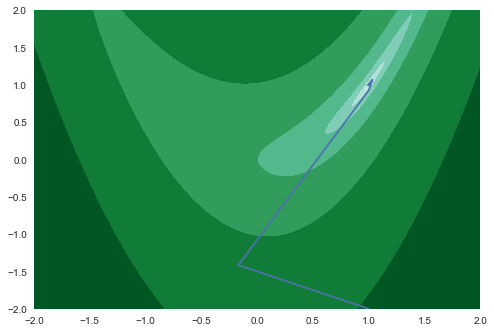

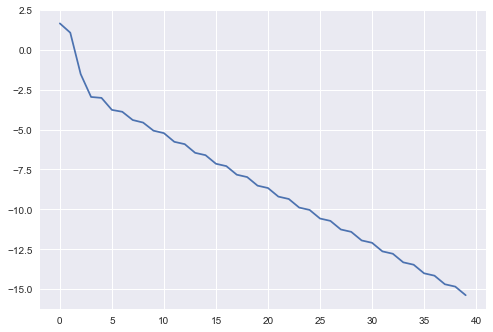

In [143]:
class BFGS:
    def __init__(self,f,ratio,alpha,c,eps=1e-7,n_iter=100):
        self.f=f
        self.ratio=ratio
        self.alpha=alpha
        self.c=c
        self.eps=eps
        self.n_iter=n_iter
        self.xl=[]
        self.fxl=[]

    # def panduan(self,x,fx,alpha,dk,gk):
    #     # Wolfe准则 这样不收敛
    #     x=np.reshape(x,[-1,])
    #     dk=np.reshape(dk,[-1,])
    #     gk=np.reshape(gk,[-1,])
    #     a=self.f.calc_val(x+alpha*dk)<=fx+self.c*alpha*gk.T@dk
    #     b=self.f.calc_gradient(x+alpha*dk).reshape([-1,]).T@dk>=0.2*gk.T@dk
    #     return a and b

    def not_accurate_line_search(self,x,dk,gk):
        # 没玩收敛。。。
        alpha=self.alpha
        m=0
        max_cishu=1000
        fx=self.f.calc_val(x)
        while not self.panduan(x=x,fx=fx,alpha=alpha,dk=dk,gk=gk):
            if m>=max_cishu:
                break
            m+=1
            alpha*= self.ratio
        return alpha,m

    def accurate_line_search(self,x,dk):
        alpha=calc_accurate_alpha(x,dk,self.f.calc_val)
        return alpha

    def modify(self,H,s,y):
        s=s.reshape([-1,1])
        y=y.reshape([-1,1])
        row=1/(y.T@s)
        V=np.eye(len(s))-row*y@s.T
        return V.T@H@V+row*s@s.T

    def go_down(self,x):
        xl=[]
        fxl=[]
        var_num=len(x)
        Hk=np.eye(var_num)
        gk=0
        for k in range(self.n_iter):
            old_gk=gk
            gk=self.f.calc_gradient(x).reshape([-1])
            # print(gk,alpha,x,'a')
            xl.append(x)
            fxl.append(self.f.calc_val(x))
            if np.linalg.norm(gk)<=self.eps:
                break
            dk=-Hk@gk
            alpha= self.accurate_line_search(x,dk)
            yk=gk-old_gk
            sk=alpha*dk
            if yk.T@sk==0:
                break
            x=x+sk
            Hk=self.modify(Hk,sk,yk)
        self.xl=xl
        self.fxl=fxl
        return x


x1,x2=sympy.symbols('x1 x2')


func_obj=Functions(sym_func=(1 - x1)**2 + 5*(x2 - x1**2)**2)
# 之前那个复杂的方程，这里不能收敛。。。不知道什么原因，github上面的代码也不能收敛。
bfgs_solver=BFGS(f=func_obj,ratio=0.9,alpha=5,c=0.8,)
x0=np.array([1,-2])
x=bfgs_solver.go_down(x0)
xl=np.array(bfgs_solver.xl)
plt.plot(xl[:,0],xl[:,1])
print(xl)
X = np.linspace(-2, 2, 200)
Y = np.linspace(-2, 2, 200)
XX, YY = np.meshgrid(X, Y)
Z = [func_obj.calc_val(np.array([XX[i, j], YY[i, j]], dtype="float64")) for i in range(200) for j in range(200)]
Z = np.log10(np.array(Z)).reshape([200, 200])
plt.contourf(XX, YY, Z, cmap=plt.cm.BuGn)

plt.show()
plt.plot(np.log10(np.array(bfgs_solver.fxl)))
# 我擦嘞，BFGS比DFP跑的慢，和书上说的不一样啊